# Analyzing the dataset named Tips

In [17]:
import pandas as pd
import seaborn as sns

## A. Data Exploration using Pandas:


Load the tips dataset using Seaborn’s sns.load_dataset('tips') method.


In [18]:
df = sns.load_dataset("Tips")

In [19]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Finding the top 5 values of the dataset 

In [20]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Check for null values and data types of each column.


In [21]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Generate basic statistics (describe()) for numerical columns.


In [22]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Find:


The total number of unique days in the dataset.


In [23]:
unique_days = df['day'].nunique()
print("Total number of unique days: ", unique_days)


Total number of unique days:  4


The average tip given by male vs female customers.


In [24]:
tip_gender= df.groupby('sex')['tip'].mean()
print("Average tip by gender:",tip_gender)

Average tip by gender: sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


The day with the highest total bill collection.


In [25]:
highest_bill = df.groupby('day')['total_bill'].sum().idxmax()
print("The day with the highest total bill collection is :", highest_bill)

The day with the highest total bill collection is : Sat


# Visualizing the dataset named Tips

In [26]:
 import matplotlib.pyplot as plt    

### B. Data Visualization using Seaborn:


Create a histogram of the total_bill column.


Text(0.5, 1.0, 'Histogram of Total Bill')

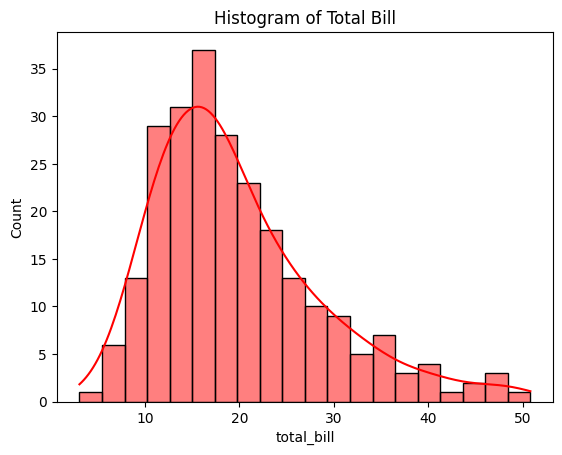

In [27]:
sns.histplot(df['total_bill'], kde=True, bins=20,color='r')
plt.title('Histogram of Total Bill')

Create a boxplot showing the distribution of tip amounts for each day.


Text(0.5, 1.0, 'Boxplot of Tip Amounts by Day')

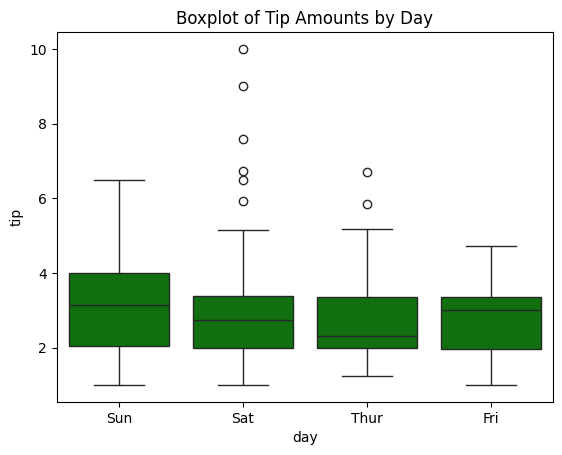

In [28]:
sns.boxplot(x='day', y='tip', data=df,color='g')
plt.title('Boxplot of Tip Amounts by Day')

Use a violin plot to compare tip distribution across different sex categories.


C:\Users\sarit\AppData\Local\Temp\ipykernel_11056\3809781821.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sex', y='tip', data=df,palette='viridis')


Text(0.5, 1.0, 'Violin Plot of Tip Distribution by Sex')

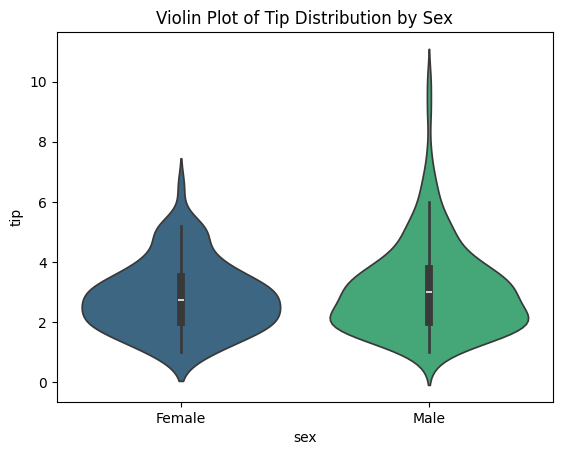

In [29]:
sns.violinplot(x='sex', y='tip', data=df,palette='viridis')
plt.title('Violin Plot of Tip Distribution by Sex')

Create a scatter plot showing the relationship between total_bill and tip, colored by sex

Text(0.5, 1.0, 'Scatter Plot of Total Bill vs Tip, Colored by Sex')

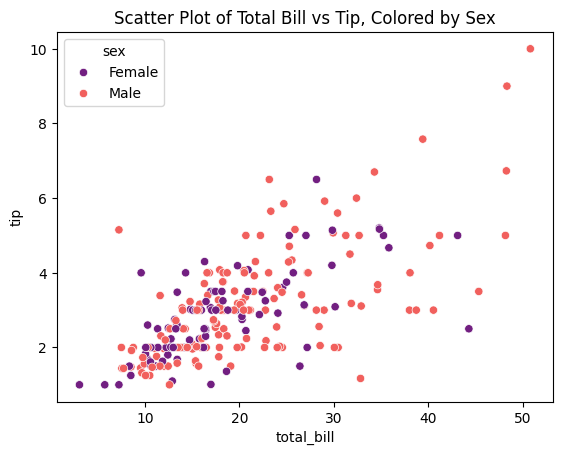

In [30]:
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=df,palette='magma')
plt.title('Scatter Plot of Total Bill vs Tip, Colored by Sex')

### C. Interactive Visualization using Plotly:


In [31]:
import plotly.express as px

Create an interactive bar chart showing average tip by day.


In [38]:
average_tip_by_day = df.groupby('day', as_index=False)['tip'].mean()
fig = px.bar(average_tip_by_day, x='day', y='tip', title='Average Tip by Day',
              labels={'tip': 'Average Tip', 'day': 'Day'},template='plotly_dark',color='tip', 
              color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

Create an interactive scatter plot of total_bill vs tip using Plotly Express, with:

- Color representing sex

- Size representing size (number of people)

In [ ]:
fig = px.scatter(df,x='total_bill',y='tip',color='sex',size='size',title='Interactive Scatter Plot of Total Bill vs Tip',
                 labels={'total_bill': 'Total Bill', 'tip': 'Tip'},hover_data=['day'],template='plotly_dark')
fig.show()

Create an interactive pie chart of the proportion of smokers vs non-smokers.

In [34]:
smoker_counts = df['smoker'].value_counts().reset_index()
smoker_counts.columns = ['smoker', 'count']
fig = px.pie(smoker_counts, values='count', names='smoker', title='Proportion of Smokers vs Non-Smokers',template='plotly_dark')
fig.show()